**Disclaimer:** Most of the content in this notebook is coming from [www.scipy-lectures.org](http://www.scipy-lectures.org/intro/index.html)

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/320px-NumPy_logo_2020.svg.png" width="50%"></center>

[NumPy](http://www.numpy.org/) is **THE** fundamental package for scientific computing with Python. It is the basic building block of most data analysis in Python and contains highly optimized routines for creating and manipulating arrays.

### Everything revolves around numpy arrays
* **`Scipy`** adds a bunch of useful science and engineering routines that operate on numpy arrays. E.g. signal processing, statistical distributions, image analysis, etc.
* **`pandas`** adds powerful methods for manipulating numpy arrays. Like data frames in R - but typically faster.
* **`scikit-learn`** supports state-of-the-art machine learning over numpy arrays. Inputs and outputs of virtually all functions are numpy arrays.
* If you want many more short exercises than the ones in this notebook - you can find 100 of them [here](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)

## NumPy arrays vs Python arrays

NumPy arrays look very similar to Pyhon arrays.

In [1]:
import numpy as np
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

**So, why is this useful?** NumPy arrays are memory-efficient containers that provide fast numerical operations. We can show this very quickly by running a simple computation on the same two arrays.

In [2]:
L = range(1000)

# Computing the power of the first 1000 numbers with Python arrays
%timeit [i**2 for i in L]

1000 loops, best of 5: 199 µs per loop


In [3]:
a = np.array(L)

# Computing the power of the first 1000 numbers with Numpy arrays
%timeit a**2

The slowest run took 1291.07 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.26 µs per loop


# Creating arrays

## Manual construction of arrays

You can create NumPy arrays manually almost in the same way as in Python in general.

### 1-D

In [4]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [5]:
a.shape

(4,)

### 2-D, 3-D, ...

In [6]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [7]:
b.shape

(2, 3)

In [8]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [9]:
c.shape

(2, 2, 1)

## Functions for creating arrays

In practice, we rarely enter items one by one. Therefore, NumPy offers many different helper functions.

### Evenly spaced

In [10]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

### ... or by number of points

In [12]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [13]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

### Common arrays

In [14]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [15]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [16]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [17]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

### `np.random`: random numbers (Mersenne Twister PRNG)

In [18]:
a = np.random.rand(4)       # uniform in [0, 1]
a

array([0.52697531, 0.13502266, 0.96782147, 0.47559624])

In [19]:
b = np.random.randn(4)      # Gaussian
b

array([-1.87520534,  1.21081707, -1.27930346, -0.77748079])

In [20]:
np.random.seed(1234)        # Setting the random seed

# Basic data types

You may have noticed that, in some instances, array elements are displayed with a trailing dot (e.g. ``2.`` vs ``2``). This is due to a difference in the data-type used:

In [21]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [22]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Different data-types allow us to store data more compactly in memory, but most of the time we simply work with floating point numbers. Note that, in the example above, NumPy auto-detects the data-type from the input.

You can explicitly specify which data-type you want:

In [23]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

The **default** data type is floating point:

In [24]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

There are also other types:

In [25]:
# Complex
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

dtype('complex128')

In [26]:
# Bool
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

In [27]:
# Strings
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- strings containing max. 7 letters

dtype('<U7')

And much more...
* ``int32``
* ``int64``
* ``uint32``
* ``uint64``

# Basic visualization

Now that we have our first data arrays, we are going to visualize them.

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
# 1D plotting
x = np.linspace(0, 3, 20)
x

array([0.        , 0.15789474, 0.31578947, 0.47368421, 0.63157895,
       0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263,
       1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632,
       2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.        ])

In [30]:
y = np.linspace(0, 9, 20)
y

array([0.        , 0.47368421, 0.94736842, 1.42105263, 1.89473684,
       2.36842105, 2.84210526, 3.31578947, 3.78947368, 4.26315789,
       4.73684211, 5.21052632, 5.68421053, 6.15789474, 6.63157895,
       7.10526316, 7.57894737, 8.05263158, 8.52631579, 9.        ])

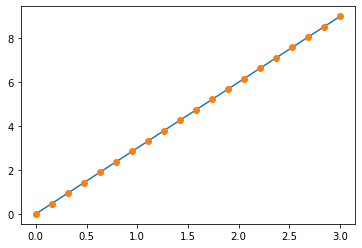

In [31]:
plt.plot(x, y)       # line plot
plt.plot(x, y, 'o')  # dot plot

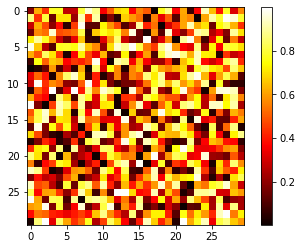

In [32]:
# 2D arrays - (such as images)
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

# Indexing and slicing

The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists):

In [33]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
a[0], a[2], a[-1]

(0, 2, 9)

**Warning**: Indices begin at 0, like other Python sequences (and C/C++). In contrast, in Fortran or Matlab, indices begin at 1.

The usual python idiom for reversing a sequence is supported:

In [35]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

For multidimensional arrays, indexes are tuples of integers:

In [36]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [37]:
a[1, 1]

1

In [38]:
a[2, 1] = 10 # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [39]:
a[1]

array([0, 1, 0])

### Note

* In 2D, the first dimension corresponds to **rows**, the second to **columns**.
* For multidimensional ``a``, ``a[0]`` is interpreted by taking all elements in the unspecified dimensions.

## Slicing: Arrays, like other Python sequences can also be sliced

In [40]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Note that the last index is not included!

In [42]:
a[:4]

array([0, 1, 2, 3])

All three slice components are not required: by default, `start` is 0,
`end` is the last and `step` is 1:

In [43]:
a[1:3]

array([1, 2])

In [44]:
a[::2]

array([0, 2, 4, 6, 8])

In [45]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

A small illustrated summary of NumPy indexing and slicing...

<img src="http://www.scipy-lectures.org/_images/numpy_indexing.png" width=60%>

You can also combine assignment and slicing:

In [46]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [47]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

# Fancy indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (**masks**). This method is called *fancy indexing*. It creates **copies not views**.

## Using boolean masks

In [48]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [49]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [50]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

Indexing with a mask can be very useful to assign a new value to a sub-array:

In [51]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

## Indexing with an array of integers

In [52]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Indexing can be done with an array of integers, where the same index is repeated several time:

In [53]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

New values can be assigned with this kind of indexing:

In [54]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

The image below illustrates various fancy indexing applications:

<img src="http://www.scipy-lectures.org/_images/numpy_fancy_indexing.png" width=60%>

# Elementwise operations

NumPy provides many elementwise operations that are much quicker than comparable list comprehension in plain Python.

## Basic operations

With scalars:

In [55]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [56]:
2**a

array([ 2,  4,  8, 16])

All arithmetic operates elementwise:

In [57]:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [58]:
a * b

array([2., 4., 6., 8.])

In [59]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

### Array multiplication is not matrix multiplication

In [60]:
c = np.ones((3, 3))
c * c                   # NOT matrix multiplication!

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [61]:
# Matrix multiplication
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

## Other operations

### Comparisons

In [62]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [63]:
a > b

array([False, False,  True, False])

Array-wise comparisons:

In [64]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [65]:
np.array_equal(a, c)

True

### Logical operations

In [66]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False])

In [67]:
np.logical_and(a, b)

array([ True, False, False, False])

### Transcendental functions

In [68]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [69]:
np.log(a)

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436])

In [70]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

### Shape mismatches

In [71]:
a = np.arange(4)

In [72]:
# NBVAL_SKIP
a + np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

*Broadcasting?* We'll return to that later.

### Transposition

In [73]:
a = np.triu(np.ones((3, 3)), 1)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [74]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

### The transposition is a view

As a result, the following code **is wrong** and will **not make a matrix symmetric**:

    >>> a += a.T

It will work for small arrays (because of buffering) but fail for large one, in unpredictable ways.

# Basic reductions

NumPy offers many quick functions to compute things like sum, mean, max etc.

## Computing sums

In [75]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

Note: Certain NumPy functions can be also written at the end of an Numpy array.

In [76]:
x.sum()

10

Sum by rows and by columns:

<img src="http://www.scipy-lectures.org/_images/reductions.png" width=20%>

In [77]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [78]:
x.sum(axis=0)   # columns (first dimension)

array([3, 3])

In [79]:
x.sum(axis=1)   # rows (second dimension)

array([2, 4])

## Other reductions

Like, `mean`, `std`, `cumsum` etc. works the same way (and take ``axis=``).

### Extrema

In [80]:
x = np.array([1, 3, 2])
x.min()

1

In [81]:
x.max()

3

In [82]:
x.argmin()  # index of minimum

0

In [83]:
x.argmax()  # index of maximum

1

### Logical operations

In [84]:
np.all([True, True, False])

False

In [85]:
np.any([True, True, False])

True

Can be used for array comparisons:

In [86]:
a = np.zeros((100, 100))
np.any(a != 0)

False

In [87]:
np.all(a == a)

True

In [88]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

True

### Statistics

In [89]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [90]:
np.median(x)

1.5

In [91]:
np.median(y, axis=-1) # last axis

array([2., 5.])

In [92]:
x.std()          # full population standard dev.

0.82915619758885

... and many more (best to learn as you go).

# Broadcasting

* Basic operations on ``numpy`` arrays (addition, etc.) are elementwise

* This works on arrays of the same size. ***Nevertheless***, It's also possible to do operations on arrays of different sizes if *NumPy* can transform these arrays so that they all have the same size: this conversion is called **broadcasting**.

The image below gives an example of broadcasting:

<img src="http://www.scipy-lectures.org/_images/numpy_broadcasting.png" width=75%>

Let's verify this:

In [93]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [94]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

We have already used broadcasting without knowing it!

In [95]:
a = np.ones((4, 5))
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

An useful trick:

In [96]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [97]:
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a.shape
a

array([[ 0],
       [10],
       [20],
       [30]])

In [98]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Broadcasting seems a bit magical, but it is actually quite natural to use it when we want to solve a problem whose output data is an array with more dimensions than input data.

A lot of grid-based or network-based problems can also use broadcasting. For instance, if we want to compute the distance from the origin of points on a 10x10 grid, we can do:

In [99]:
x, y = np.arange(5), np.arange(5)[:, None]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

Or in color:

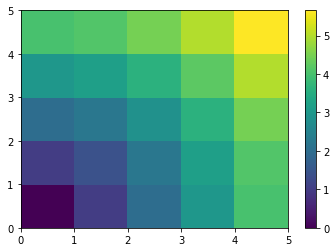

In [100]:
plt.pcolor(distance)
plt.colorbar()

# Array shape manipulation

Sometimes your arrays don't have the right shape. Also for this, NumPy has many solutions.

## Flattening

In [101]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [102]:
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [103]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [104]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Higher dimensions: last dimensions ravel out "first".

## Reshaping

The inverse operation to flattening:

In [105]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [106]:
a.reshape(6, 2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

Or,

In [107]:
a.reshape((6, -1))    # unspecified (-1) value is inferred

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

## Adding a dimension

Indexing with the ``np.newaxis`` or ``None`` object allows us to add an axis to an array (you have seen this already above in the broadcasting section):

In [108]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [109]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [110]:
z[np.newaxis, :]

array([[1, 2, 3]])

## Dimension shuffling

In [111]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [112]:
a.shape

(4, 3, 2)

In [113]:
b = a.transpose(1, 2, 0)
b

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19]],

       [[ 2,  8, 14, 20],
        [ 3,  9, 15, 21]],

       [[ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [114]:
b.shape

(3, 2, 4)

## Resizing

Size of an array can be changed with ``ndarray.resize``:

In [115]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

# Sorting data

Sorting along an axis:

In [116]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

**Important**: Note that the code above sorts each row separately!

In-place sort:

In [117]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

Sorting with fancy indexing:

In [118]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [119]:
a[j]

array([1, 2, 3, 4])

Finding minima and maxima:

In [120]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

# `npy` - NumPy's own data format

NumPy has its own binary format, not portable but with efficient I/O:

In [121]:
data = np.ones((3, 3))
np.save('pop.npy', data)
data3 = np.load('pop.npy')

# Summary - What do you need to know to get started?

* Know how to create arrays : ``array``, ``arange``, ``ones``, ``zeros``.
* Know the shape of the array with ``array.shape``, then use slicing to obtain different views of the array: ``array[::2]``, etc. Adjust the shape of the array using ``reshape`` or flatten it with ``ravel``.
* Obtain a subset of the elements of an array and/or modify their values with masks  
     ``a[a < 0] = 0``
* Know miscellaneous operations on arrays, such as finding the mean or max (``array.max()``, ``array.mean()``).
* For advanced use: master the indexing with arrays of integers, as well as broadcasting.